<a href="https://colab.research.google.com/github/suvarnp2/ML-Mini-Project-Loan-Approval-System/blob/main/Pashmina_Suvarnakar_Lending_Club_Loan_Approval_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lending Club Loan Approval System

Full Name: Pashmina Suvarnakar

Uplevel Email Address: pashmina.15@gmail.com

## Business Background

Lending Club is a peer-to-peer lending company where individuals can borrow loans, and investors can fund those loans. Lending Club was founded in 2006 by Renaud Laplanche as a peer-to-peer (P2P) lending platform in San Francisco. It was one of the pioneers in the online lending space, where individual borrowers could obtain loans, and individual or institutional investors could invest in these loans to earn interest. The platform allowed for a more direct connection between lenders and borrowers, bypassing traditional banking intermediaries.

Read more here https://en.wikipedia.org/wiki/LendingClub

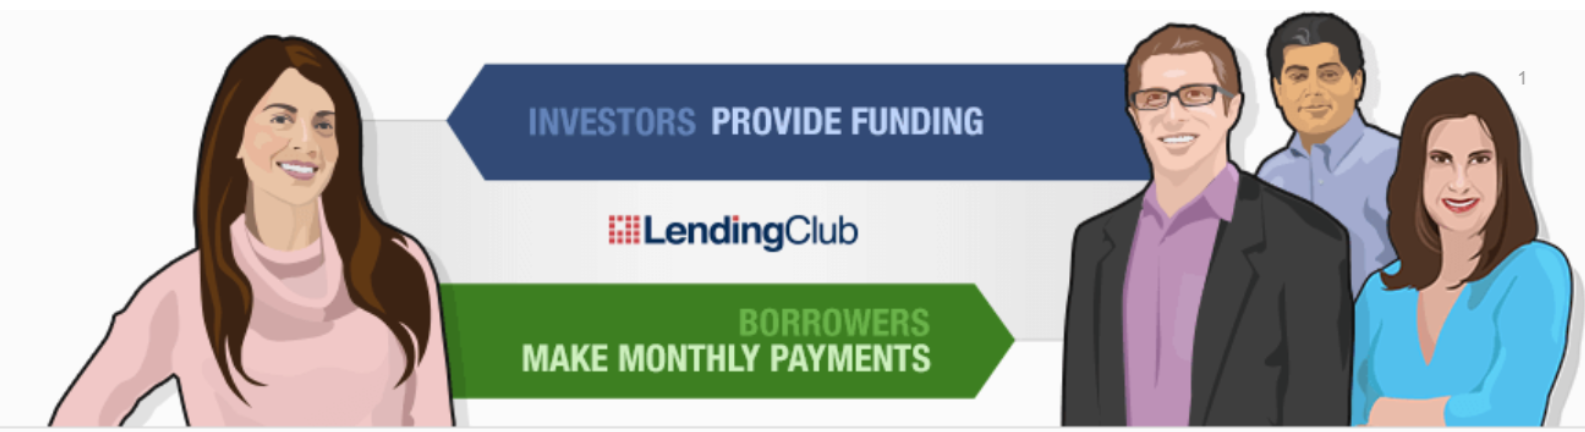

## Problem Statement

Now, whenever *Lending Club* approves a loan, there are two ways in which it is at risk:
- If LC approves a loan and the borrower fails to repay it on time
- If LC rejects a loan despite the borrower being capable of repaying the loan

Defaulting on loans can lead to significant financial losses for both the platform and investors. Similarly, not providing loans to credit-worthy customers can lead to missing out on potential revenue and profits. Therefore, a robust loan approval system is the need of the hour.

In the current loan approval process, underwriters evaluate loan applications by manually reviewing credit scores, income, debt, etc. and then, based on several parameters, either approve or reject a loan. This process is time-consuming and prone to errors.

Hence, Lending Club wants to build a loan approval system using Machine Learning models to automatically assess whether a given loan is likely to be repaid or whether the borrower is likely to default.

This is where you come in! As a budding data scientist, your goal is to help out Lending Club in creating this ML model that helps them predict whether a loan is likely to default or not.

## Data Understanding

You have been provided with around 38k loan application data from the Lending Club's website. The different columns and their description are mentioned below:

| Column Name         | Description                                                                                                                                                    |
|---------------------|----------------------------------------------------------------------------------------------------------------------------------------------------------------|
| id                  | A unique LC assigned ID for the loan listing. *(Integer)*                                                                                                       |
| member_id           | A unique LC assigned ID for the borrower member. *(Integer)*                                                                                                    |
| loan_amnt           | The listed amount of the loan applied for by the borrower. If at some point the credit department reduces the loan amount, it will be reflected in this value. *(Float)* |
| term                | The number of payments on the loan. Values are in months and can be either 36 or 60. *(Integer)*                                                                 |
| int_rate            | Interest rate on the loan. *(Float)*                                                                                                                            |
| installment         | The monthly payment owed by the borrower if the loan originates. *(Float)*                                                                                       |
| grade               | LC assigned loan grade. *(Categorical/String)*                                                                                                                  |
| sub_grade           | LC assigned loan subgrade. *(Categorical/String)*                                                                                                               |
| emp_length          | Employment length in years. Possible values are between 0 and 10, where 0 means less than one year and 10 means ten or more years. *(Integer)*                   |
| home_ownership      | The home ownership status provided by the borrower during registration. Values are: RENT, OWN, MORTGAGE, OTHER. *(Categorical/String)*                           |
| annual_inc          | The self-reported annual income provided by the borrower during registration. *(Float)*                                                                         |
| verification_status | Indicates if income was verified by LC, not verified, or if the income source was verified. *(Categorical/String)*                                               |
| purpose             | A category provided by the borrower for the loan request. *(Categorical/String)*                                                                                |
| dti                 | A ratio calculated using the borrower’s total monthly debt payments (excluding mortgage and the requested LC loan), divided by the borrower’s self-reported income. *(Float)* |
| delinq_2yrs         | The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years. *(Integer)*                                         |
| inq_last_6mths      | The number of inquiries in the past 6 months (excluding auto and mortgage inquiries). *(Integer)*                                                                |
| open_acc            | The number of open credit lines in the borrower's credit file. *(Integer)*                                                                                       |
| pub_rec             | Number of derogatory public records. *(Integer)*                                                                                                                |
| revol_bal           | Total credit revolving balance. *(Float)*                                                                                                                       |
| revol_util          | Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit. *(Float)*                             |
| total_acc           | The total number of credit lines currently in the borrower's credit file. *(Integer)*                                                                            |
| last_pymnt_amnt     | Last total payment amount received. *(Float)*                                                                                                                   |
| loan_status         | Current status of the loan. *(Categorical/String)*                                                                 
                  |

...

## Starter Code

### Necessary Imports

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
pd.set_option('display.max_columns', None)
import warnings
# Suppress all warnings
warnings.filterwarnings('ignore')

### Data Loading

In [ ]:
#from google.colab import files
#data = files.upload()

In [ ]:
## Load the dataset
data = pd.read_csv('/content/loans.csv')

In [ ]:
## Observe the first few rows
## Do you observe any issues?
data.head()

,id,member_id,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,purpose,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,last_pymnt_amnt,loan_status
0,1077501,1296599.0,5000.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,Verified,credit_card,27.65,0.0,1.0,3.0,0.0,13648.0,83.7%,9.0,171.62,Fully Paid
1,1077430,1314167.0,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,car,1.00,0.0,5.0,3.0,0.0,1687.0,9.4%,4.0,119.66,Charged Off
2,1077175,1313524.0,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,small_business,8.72,0.0,2.0,2.0,0.0,2956.0,98.5%,10.0,649.91,Fully Paid
3,1076863,1277178.0,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,other,20.00,0.0,1.0,10.0,0.0,5598.0,21%,37.0,357.48,Fully Paid
4,1075269,1311441.0,5000.0,36 months,7.90%,156.46,A,A4,3 years,RENT,36000.0,Source Verified,wedding,11.20,0.0,3.0,9.0,0.0,7963.0,28.3%,12.0,161.03,Fully Paid


In [ ]:
## Check the dataframe structure - datatypes and number of non-null rows
data.describe()

,id,member_id,loan_amnt,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,last_pymnt_amnt
count,3.877000e+04,3.877000e+04,38770.000000,38770.000000,3.877000e+04,38770.000000,38770.000000,38770.000000,38770.000000,38770.000000,38770.000000,38770.000000,38770.000000
mean,6.769960e+05,8.430892e+05,11069.122388,322.629489,6.880025e+04,13.276704,0.146660,0.871473,9.278850,0.055404,13297.262626,22.059788,2735.887820
std,2.090226e+05,2.641345e+05,7362.292600,208.592815,6.416132e+04,6.676355,0.492197,1.071444,4.401871,0.237727,15861.575434,11.420556,4486.352373
min,5.473400e+04,7.069900e+04,500.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000
25%,5.127032e+05,6.619100e+05,5325.000000,165.740000,4.000000e+04,8.130000,0.000000,0.000000,6.000000,0.000000,3654.000000,13.000000,216.822500
50%,6.579935e+05,8.410920e+05,9737.500000,278.150000,5.892350e+04,13.370000,0.000000,1.000000,9.000000,0.000000,8777.000000,20.000000,565.400000
75%,8.287202e+05,1.037010e+06,15000.000000,426.100000,8.200000e+04,18.560000,0.000000,1.000000,12.000000,0.000000,16938.000000,29.000000,3425.470000
max,1.077501e+06,1.314167e+06,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,44.000000,4.000000,149588.000000,90.000000,36115.200000


In [ ]:
## Check the number of non-null rows per column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38770 entries, 0 to 38769
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   38770 non-null  int64  
 1   member_id            38770 non-null  float64
 2   loan_amnt            38770 non-null  float64
 3   term                 38770 non-null  object 
 4   int_rate             38770 non-null  object 
 5   installment          38770 non-null  float64
 6   grade                38770 non-null  object 
 7   sub_grade            38770 non-null  object 
 8   emp_length           37734 non-null  object 
 9   home_ownership       38770 non-null  object 
 10  annual_inc           38770 non-null  float64
 11  verification_status  38770 non-null  object 
 12  purpose              38770 non-null  object 
 13  dti                  38770 non-null  float64
 14  delinq_2yrs          38770 non-null  float64
 15  inq_last_6mths       38770 non-null 

In [ ]:
## Check the shape
print("Total data count (rows):", data.shape[0])


Total data count (rows): 38770


In [ ]:
## Check the missing values across the columns
print("\nNull values per column:")
display(data.isnull().sum())


Null values per column:


,0
id,0
member_id,0
loan_amnt,0
term,0
int_rate,0
installment,0
grade,0
sub_grade,0
emp_length,1036
home_ownership,0


In [ ]:
# Total data count (number of rows)
print("Total data count (rows):", data.shape[0])

# Number of null values per column
print("\nNull values per column:")
display(data.isnull().sum())

Total data count (rows): 38770

Null values per column:


,0
id,0
member_id,0
loan_amnt,0
term,0
int_rate,0
installment,0
grade,0
sub_grade,0
emp_length,1036
home_ownership,0


#### Observations

- Document your observations

There are 38770 records,
only revol_util is missing values for 50 records. We can drop those records.
emp_length also has 1000 records with missing value, but it is not a useful information , so we can drop this coloumn.
loan_status column seems like an important column as target. It determines whether the loan was fully paid or not.

### Data Cleaning

- Perform missing value treatment
- Remove extra symbols, characters, etc. from appropriate columns

In [ ]:
## drop records with missing values for revol_util
data = data.dropna(subset=['revol_util'])

In [ ]:
## replace loan status = 1 for fully paid, and 0 for charged off. This will be the target column for which the model will be trained.
data['loan_status'] = data['loan_status'].replace({'Fully Paid': 0, 'Charged Off': 1})

In [ ]:
## replace loan status = 1 for fully paid, and 0 for charged off. This will be the target column for which the model will be trained.
data['term'] = data['term'].str.rstrip(' months').astype(float)

##### Dropping the unnecessary columns

- Columns which are not required for analysis - `id`, `member_id`
- Columns which are not available at the time of loan approval (Check the data dictionary and problem statement to understand this more) - `installment` and `last_pymnt_amnt`

In [ ]:
## Drop the above columns
# Dropping columns that are not useful for modeling
columns_to_drop = ['id', 'member_id','installment','grade','sub_grade','emp_length','verification_status','purpose','last_pymnt_amnt']
data = data.drop(columns=columns_to_drop)

In [ ]:
## Check the dataframe again
data.describe()

,loan_amnt,term,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,loan_status
count,38720.000000,38720.000000,3.872000e+04,38720.000000,38720.000000,38720.000000,38720.000000,38720.000000,38720.000000,38720.00000,38720.000000
mean,11077.349561,41.994421,6.883138e+04,13.280317,0.146643,0.871488,9.284814,0.055424,13313.162035,22.07469,0.145093
std,7362.277806,10.389216,6.415749e+04,6.674714,0.491971,1.071654,4.400444,0.237775,15863.703384,11.41722,0.352199
min,500.000000,36.000000,4.000000e+03,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.00000,0.000000
25%,5393.750000,36.000000,4.000000e+04,8.140000,0.000000,0.000000,6.000000,0.000000,3667.750000,13.00000,0.000000
50%,9800.000000,36.000000,5.900000e+04,13.370000,0.000000,1.000000,9.000000,0.000000,8792.000000,20.00000,0.000000
75%,15000.000000,36.000000,8.200000e+04,18.560000,0.000000,1.000000,12.000000,0.000000,16948.250000,29.00000,0.000000
max,35000.000000,60.000000,6.000000e+06,29.990000,11.000000,8.000000,44.000000,4.000000,149588.000000,90.00000,1.000000


Perform any additional data preparation steps if needed

In [ ]:
## Write the code

### Exploratory Data Analysis

Let's understand the key drivers of loan default using EDA. This will form the preliminary analysis before we start with our machine learning model building part. We can understand the distributions of different variables, how they are related with loan default and so on.

#### Univariate Analysis

Perform univariate analysis on the following variables. Use visualizations and summary statistics wherever necessary. Document your overall observations as well
- `loan_status`
- `term`
- `grade`
- `purpose`
- `loan_amnt`
- `annual_inc`

*Note* - You can do additional analysis as well

loan_status
0    33102
1     5618
Name: count, dtype: int64


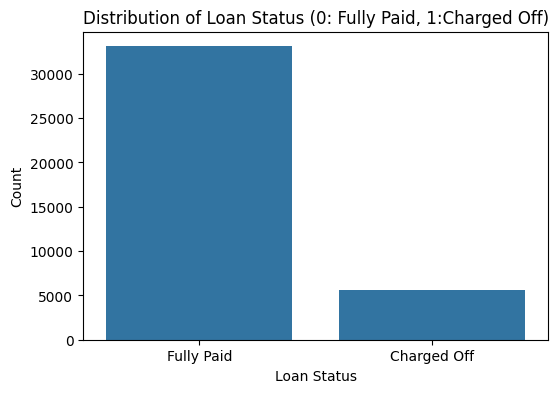

In [ ]:
# Univariate analysis on loan_status
# Get the value counts for 'loan_status'
loan_status_counts = data['loan_status'].value_counts()
print(loan_status_counts)

# Plot the distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='loan_status', data=data)
plt.title('Distribution of Loan Status (0: Fully Paid, 1:Charged Off)')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Fully Paid', 'Charged Off'])
plt.show()

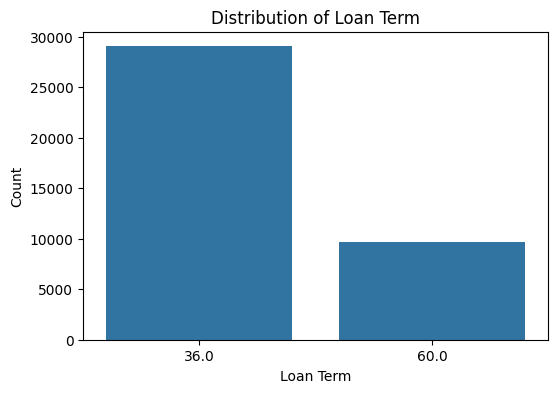

In [ ]:
## univariate analysis on term
term_counts = data['term'].value_counts()

plt.figure(figsize=(6, 4))
sns.countplot(x='term', data=data, order=term_counts.index)
plt.title('Distribution of Loan Term')
plt.xlabel('Loan Term')
plt.ylabel('Count')
plt.show()

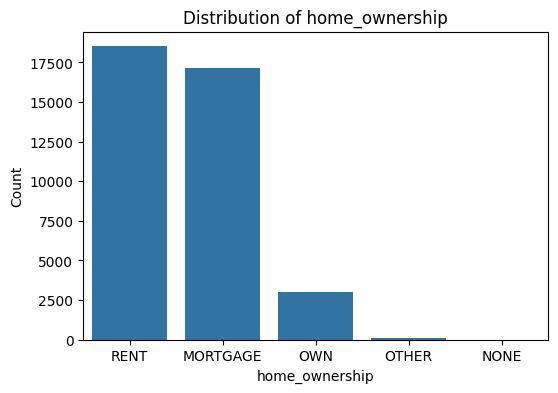

In [ ]:
## univariate analysis on term
home_ownership_counts = data['home_ownership'].value_counts()

plt.figure(figsize=(6, 4))
sns.countplot(x='home_ownership', data=data, order=home_ownership_counts.index)
plt.title('Distribution of home_ownership')
plt.xlabel('home_ownership')
plt.ylabel('Count')
plt.show()

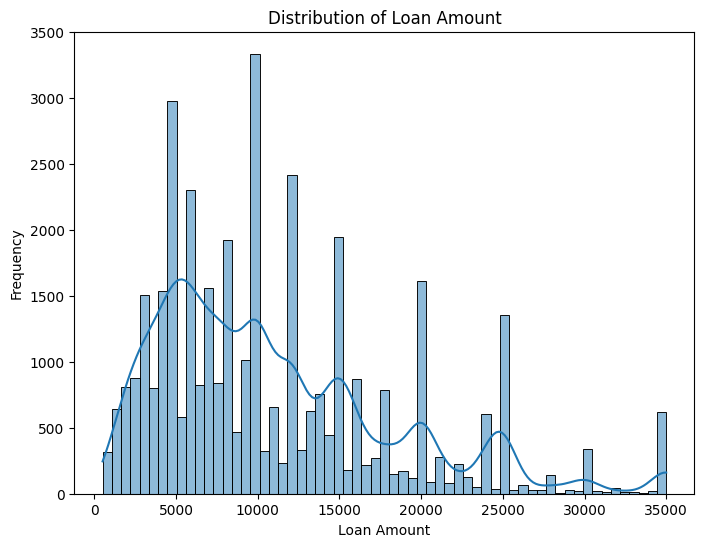

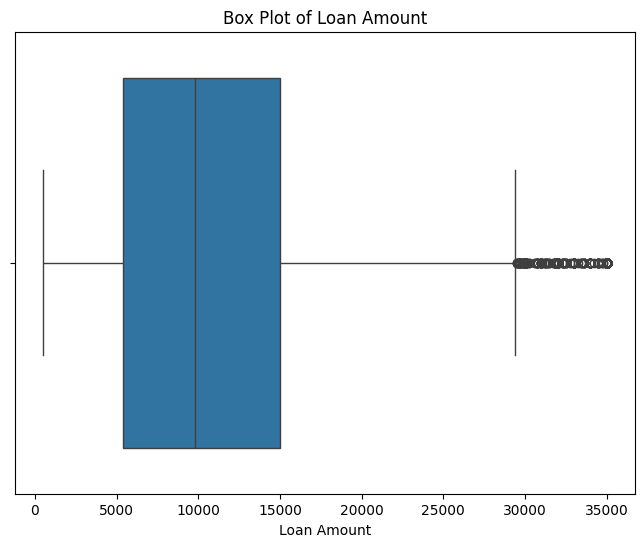

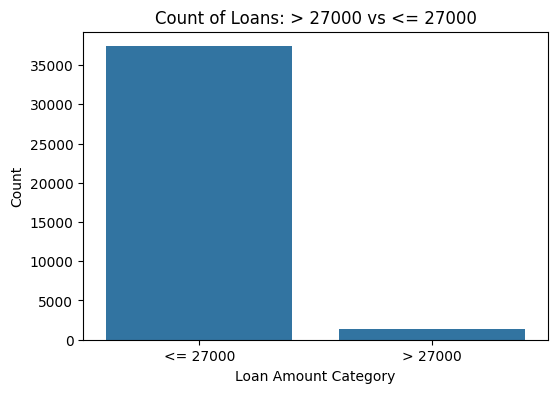

In [ ]:
## univariate analysis on loan_amnt
# Plot the distribution of 'loan_amnt' using a histogram
plt.figure(figsize=(8, 6))
sns.histplot(data['loan_amnt'], kde=True)
plt.title('Distribution of Loan Amount')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.show()

# Plot the distribution of 'loan_amnt' using a box plot to see outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['loan_amnt'])
plt.title('Box Plot of Loan Amount')
plt.xlabel('Loan Amount')
plt.show()

# Create a new column categorizing loan amount
data['loan_amnt_category'] = data['loan_amnt'].apply(lambda x: '> 27000' if x > 27000 else '<= 27000')

# Create a count plot for the new category column
plt.figure(figsize=(6, 4))
sns.countplot(x='loan_amnt_category', data=data)
plt.title('Count of Loans: > 27000 vs <= 27000')
plt.xlabel('Loan Amount Category')
plt.ylabel('Count')
plt.show()

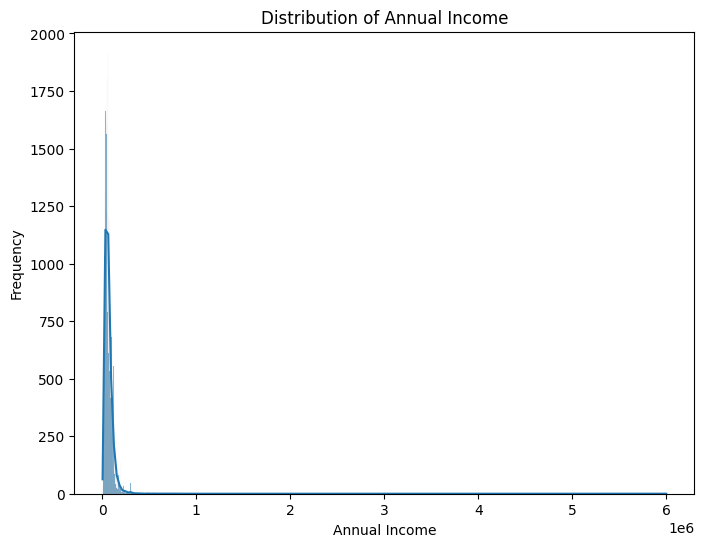

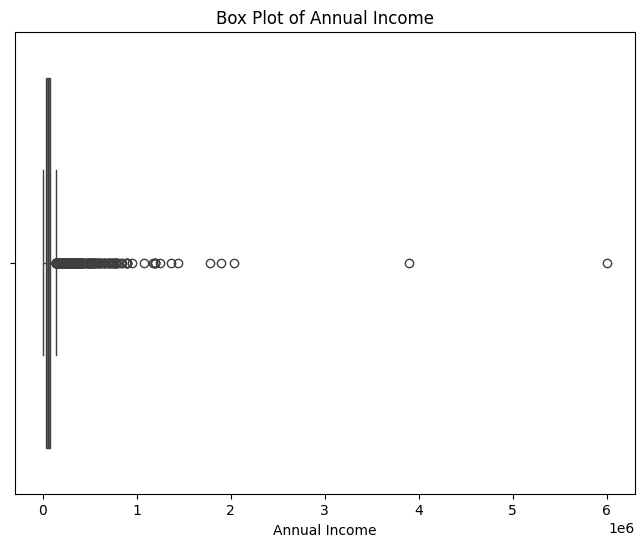

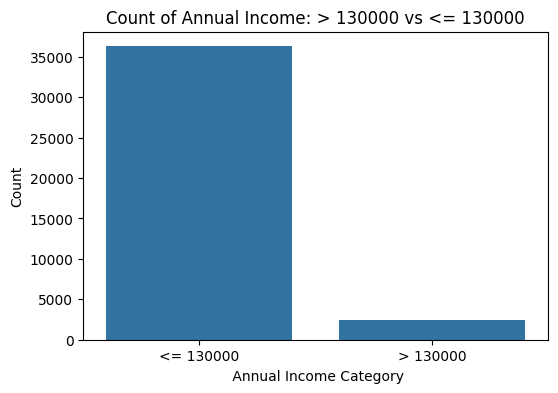

In [ ]:
# Plot the distribution of 'annual_inc' using a histogram
plt.figure(figsize=(8, 6))
sns.histplot(data['annual_inc'], kde=True)
plt.title('Distribution of Annual Income')
plt.xlabel('Annual Income')
plt.ylabel('Frequency')
plt.show()

# Plot the distribution of 'loan_amnt' using a box plot to see outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['annual_inc'])
plt.title('Box Plot of Annual Income')
plt.xlabel('Annual Income')
plt.show()

# Create a new column categorizing annual Income
data['annual_inc_category'] = data['annual_inc'].apply(lambda x: '> 130000' if x > 130000 else '<= 130000')

# Create a count plot for the new category column
plt.figure(figsize=(6, 4))
sns.countplot(x='annual_inc_category', data=data)
plt.title('Count of Annual Income: > 130000 vs <= 130000')
plt.xlabel(' Annual Income Category')
plt.ylabel('Count')
plt.show()

# can we Remove records where annual_inc > 130000
# data = data[data['annual_inc'] <= 130000].copy()

In [ ]:
## Write Code here

**Observations**

- Only 14% of dataset has negative loan_status(Charged OFF). This dataset is highly imbalanced. This will cause bias later in the model. It may require to use Stratified K-Fold Method to make sure the training dataset has both type of data.
- Loan amount above 27000 can be removed as they could become outliers.
- Annual income has some outliers that can be removed from the dataset. Annual Income: > 130000 can be removed from dataset.

#### Bivariate Analysis

For the bivariate analysis, you can perform multiple analysis such as follows:

- How the default rate varies across the different variables
- Correlation Matrix
- etc.

term
36.0    0.110641
60.0    0.248578
Name: loan_status, dtype: float64


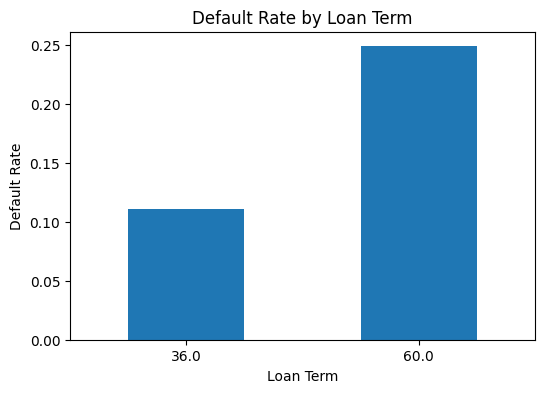

In [ ]:
# Calculate the default rate by term
term_default_rate = data.groupby('term')['loan_status'].mean()
print(term_default_rate)

# Plot the default rate by term
plt.figure(figsize=(6, 4))
term_default_rate.plot(kind='bar')
plt.title('Default Rate by Loan Term')
plt.xlabel('Loan Term')
plt.ylabel('Default Rate')
plt.xticks(rotation=0)
plt.show()

home_ownership
MORTGAGE    0.135896
NONE        0.000000
OTHER       0.187500
OWN         0.147975
RENT        0.152932
Name: loan_status, dtype: float64


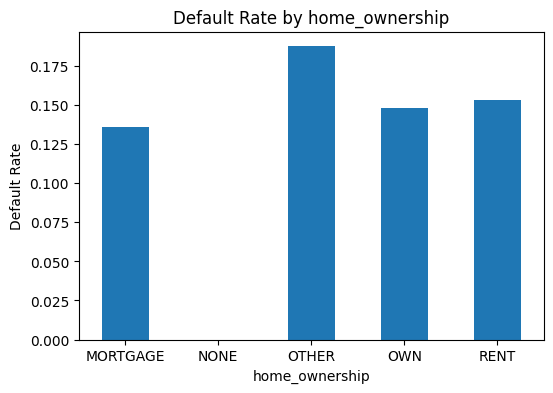

In [ ]:
# Calculate the default rate by term
term_default_rate = data.groupby('home_ownership')['loan_status'].mean()
print(term_default_rate)

# Plot the default rate by term
plt.figure(figsize=(6, 4))
term_default_rate.plot(kind='bar')
plt.title('Default Rate by home_ownership')
plt.xlabel('home_ownership')
plt.ylabel('Default Rate')
plt.xticks(rotation=0)
plt.show()

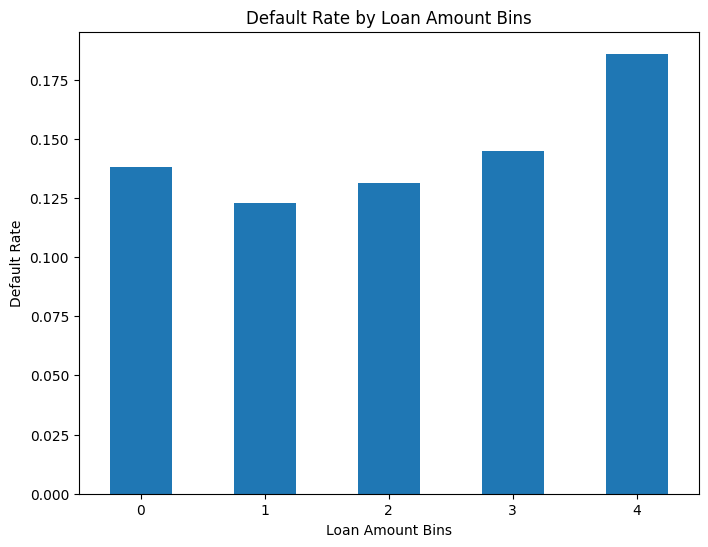

In [ ]:
# Create bins for 'loan_amnt'
data['loan_amnt_bins'] = pd.qcut(data['loan_amnt'], q=5, labels=False, duplicates='drop')

# Calculate the default rate per 'loan_amnt' bin
loan_amnt_default_rate = data.groupby('loan_amnt_bins')['loan_status'].mean()

# Visualize the default rate per 'loan_amnt' bin
plt.figure(figsize=(8, 6))
loan_amnt_default_rate.plot(kind='bar')
plt.title('Default Rate by Loan Amount Bins')
plt.xlabel('Loan Amount Bins')
plt.ylabel('Default Rate')
plt.xticks(rotation=0)
plt.show()

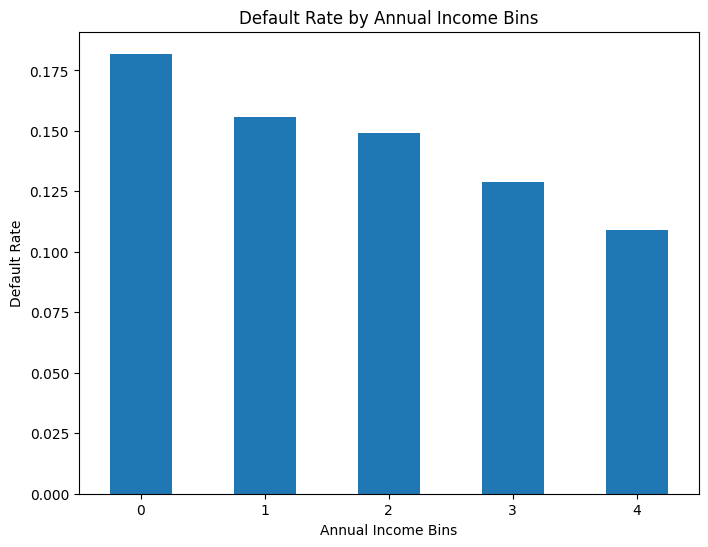

In [ ]:
# Create bins for 'annual_inc'
data['annual_inc_bins'] = pd.qcut(data['annual_inc'], q=5, labels=False, duplicates='drop')

# Calculate the default rate per 'annual_inc' bin
annual_inc_default_rate = data.groupby('annual_inc_bins')['loan_status'].mean()

# Visualize the default rate per 'annual_inc' bin
plt.figure(figsize=(8, 6))
annual_inc_default_rate.plot(kind='bar')
plt.title('Default Rate by Annual Income Bins')
plt.xlabel('Annual Income Bins')
plt.ylabel('Default Rate')
plt.xticks(rotation=0)
plt.show()

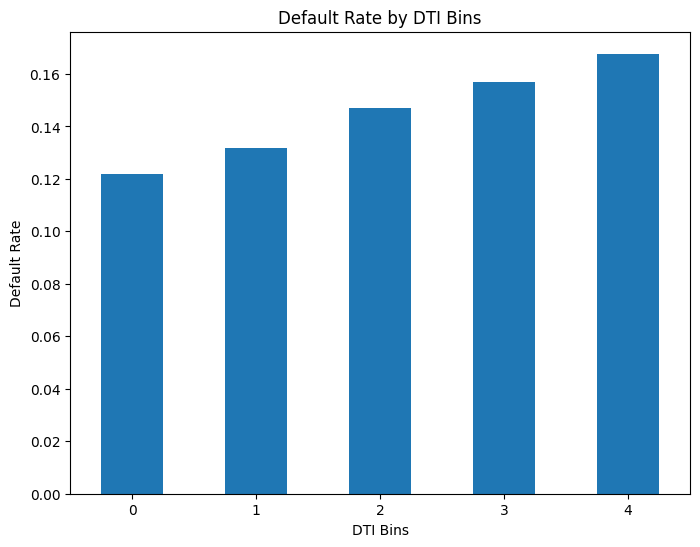

In [ ]:
# Create bins for 'dti'
data['dti_bins'] = pd.qcut(data['dti'], q=5, labels=False, duplicates='drop')

# Calculate the default rate per 'dti' bin
dti_default_rate = data.groupby('dti_bins')['loan_status'].mean()

# Visualize the default rate per 'dti' bin
plt.figure(figsize=(8, 6))
dti_default_rate.plot(kind='bar')
plt.title('Default Rate by DTI Bins')
plt.xlabel('DTI Bins')
plt.ylabel('Default Rate')
plt.xticks(rotation=0)
plt.show()

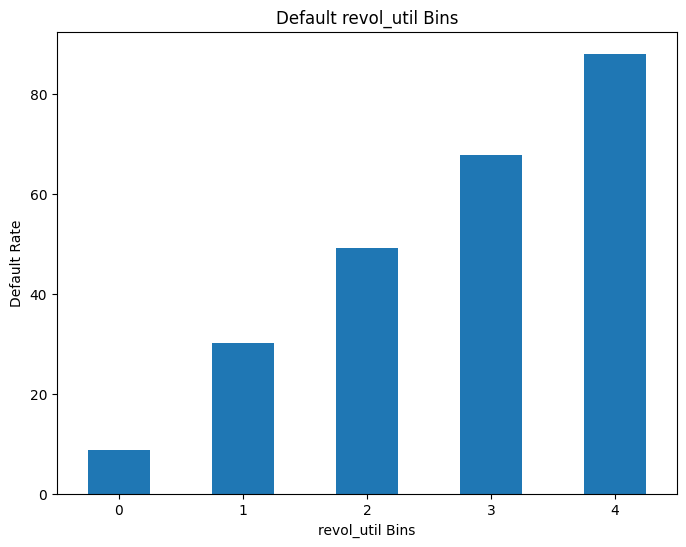

In [ ]:
# Create bins for 'revol_util'
data['revol_util'] = data['revol_util'].str.rstrip('%').astype(float)
data['revol_util_bins'] = pd.qcut(data['revol_util'], q=5, labels=False, duplicates='drop')

# Calculate the default rate per 'revol_util' bin
dti_default_rate = data.groupby('revol_util_bins')['revol_util'].mean()

# Visualize the default rate per 'dti' bin
plt.figure(figsize=(8, 6))
dti_default_rate.plot(kind='bar')
plt.title('Default revol_util Bins')
plt.xlabel('revol_util Bins')
plt.ylabel('Default Rate')
plt.xticks(rotation=0)
plt.show()

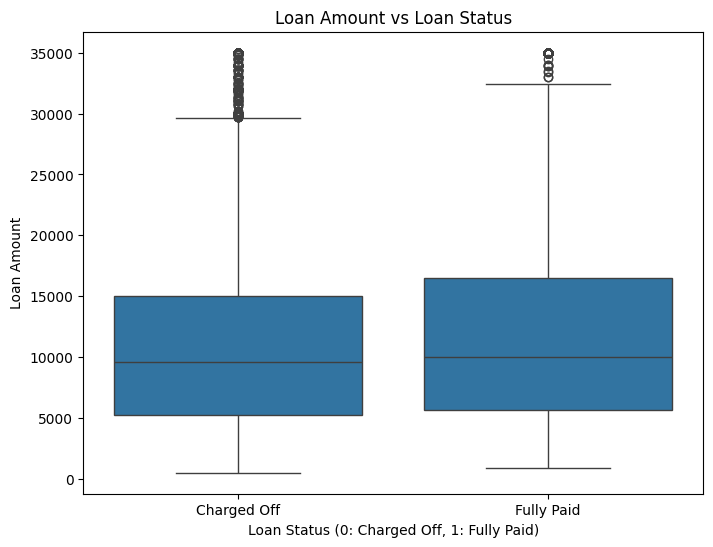

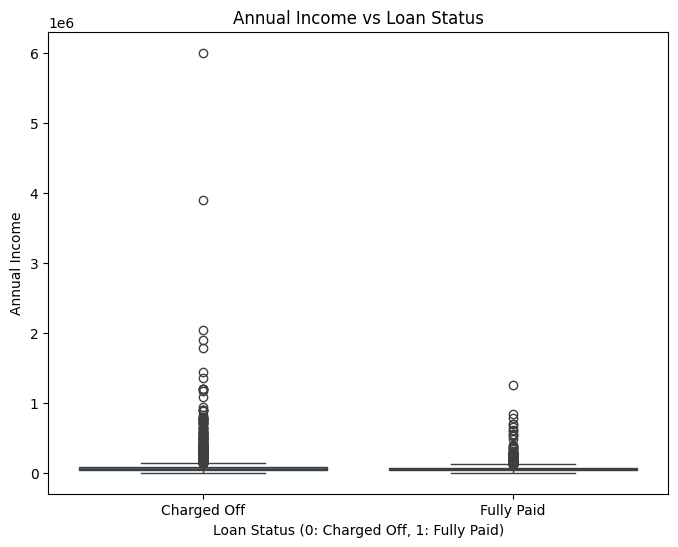

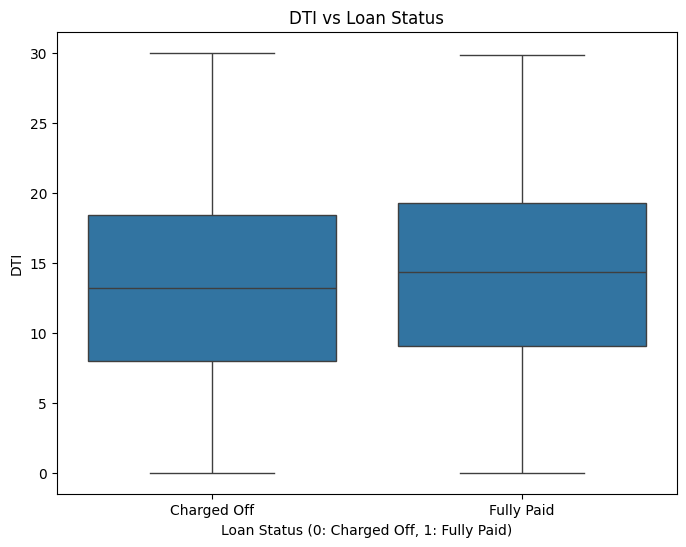

In [ ]:
# Box plot for loan_amnt vs loan_status
plt.figure(figsize=(8, 6))
sns.boxplot(x='loan_status', y='loan_amnt', data=data)
plt.title('Loan Amount vs Loan Status')
plt.xlabel('Loan Status (0: Charged Off, 1: Fully Paid)')
plt.ylabel('Loan Amount')
plt.xticks(ticks=[0, 1], labels=['Charged Off', 'Fully Paid'])
plt.show()

# Box plot for annual_inc vs loan_status
plt.figure(figsize=(8, 6))
sns.boxplot(x='loan_status', y='annual_inc', data=data)
plt.title('Annual Income vs Loan Status')
plt.xlabel('Loan Status (0: Charged Off, 1: Fully Paid)')
plt.ylabel('Annual Income')
plt.xticks(ticks=[0, 1], labels=['Charged Off', 'Fully Paid'])
plt.show()

# Box plot for dti vs loan_status
plt.figure(figsize=(8, 6))
sns.boxplot(x='loan_status', y='dti', data=data)
plt.title('DTI vs Loan Status')
plt.xlabel('Loan Status (0: Charged Off, 1: Fully Paid)')
plt.ylabel('DTI')
plt.xticks(ticks=[0, 1], labels=['Charged Off', 'Fully Paid'])
plt.show()

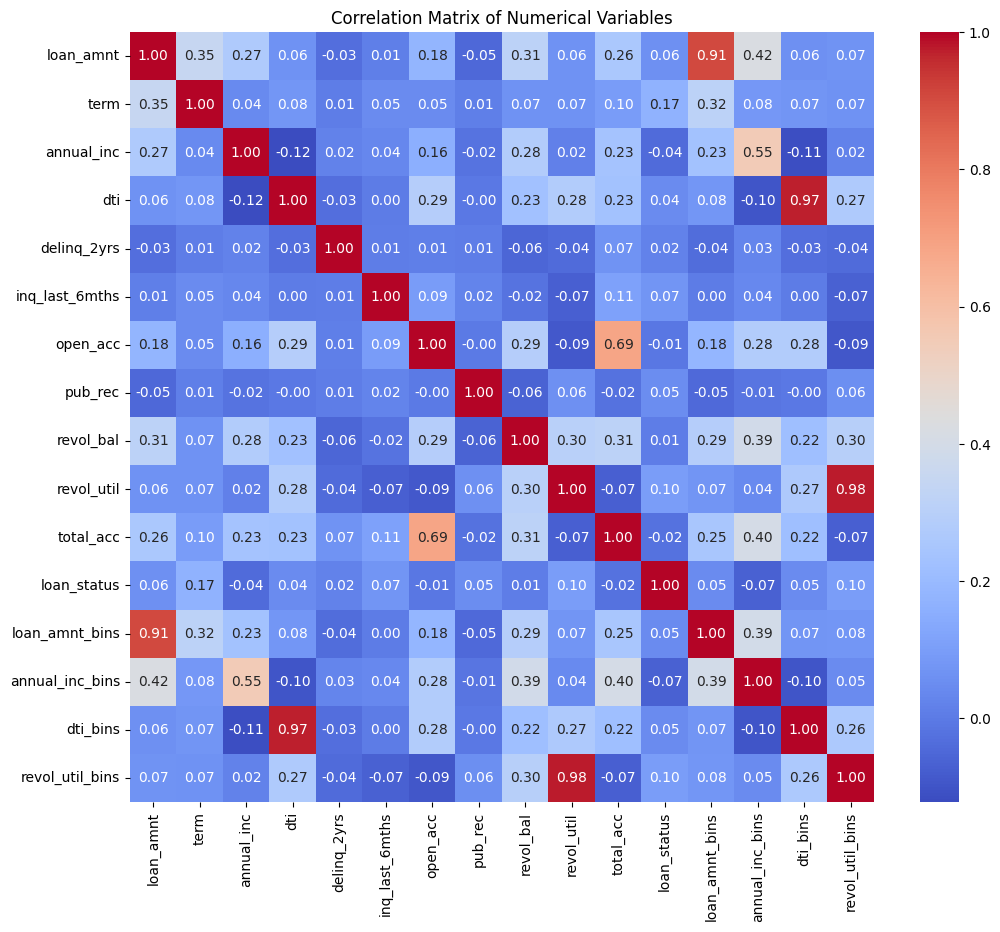

In [ ]:
# Select only numerical columns for correlation analysis, including the target variable 'loan_status'
numerical_data = data.select_dtypes(include=[np.number])

# Calculate the correlation matrix
correlation_matrix = numerical_data.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

Observations:

-Higher loan amounts appear to be associated with higher default rates.

-Lower annual incomes are associated with higher default rates.

-Higher Debt-to-Income (DTI) ratios are associated with higher default rates.
Loans with a 60-month term have a significantly higher default rate compared to those with a 36-month term. However the number of dataset for 36-months is way higher than 60-monhts, so it may not be accurate observation.

-Higher the Revolving line utilization rate are associated with higher default rates.


#### Pre-ML Data Pre-Processing

Before building the machine learning model, we shall perform
- encoding on all the categorical variables
- handle class imbalance
- train-test split
- scaling

##### Encoding variables

In [ ]:
data['int_rate'] = data['int_rate'].str.rstrip('%').astype(float)

data['home_ownership'] = data['home_ownership'].replace({'RENT': 0, 'OWN': 1, 'MORTGAGE': 2, 'OTHER': 3, 'NONE': 4})

# Dropping columns that are not useful for modeling
columns_to_drop = ['open_acc','loan_amnt_bins','annual_inc_bins','dti_bins','revol_util_bins','loan_amnt_category', 'annual_inc_category']
data = data.drop(columns=columns_to_drop)


In [ ]:
# Get the number of rows before removing outliers
rows_before_removal = data.shape[0]

# Remove records where annual_inc > 130000
data = data[data['annual_inc'] <= 130000].copy()
data = data[data['loan_amnt'] <= 27000].copy()

# Get the number of rows after removing outliers
rows_after_removal = data.shape[0]

print(f"Number of rows before removing outliers: {rows_before_removal}")
print(f"Number of rows after removing outliers in 'annual_inc': {rows_after_removal}")
print(f"Number of rows removed: {rows_before_removal - rows_after_removal}")

data.info()

Number of rows before removing outliers: 38720
Number of rows after removing outliers in 'annual_inc': 35328
Number of rows removed: 3392
<class 'pandas.core.frame.DataFrame'>
Index: 35328 entries, 0 to 38769
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   loan_amnt       35328 non-null  float64
 1   term            35328 non-null  float64
 2   int_rate        35328 non-null  float64
 3   home_ownership  35328 non-null  int64  
 4   annual_inc      35328 non-null  float64
 5   dti             35328 non-null  float64
 6   delinq_2yrs     35328 non-null  float64
 7   inq_last_6mths  35328 non-null  float64
 8   pub_rec         35328 non-null  float64
 9   revol_bal       35328 non-null  float64
 10  revol_util      35328 non-null  float64
 11  total_acc       35328 non-null  float64
 12  loan_status     35328 non-null  int64  
dtypes: float64(11), int64(2)
memory usage: 3.8 MB


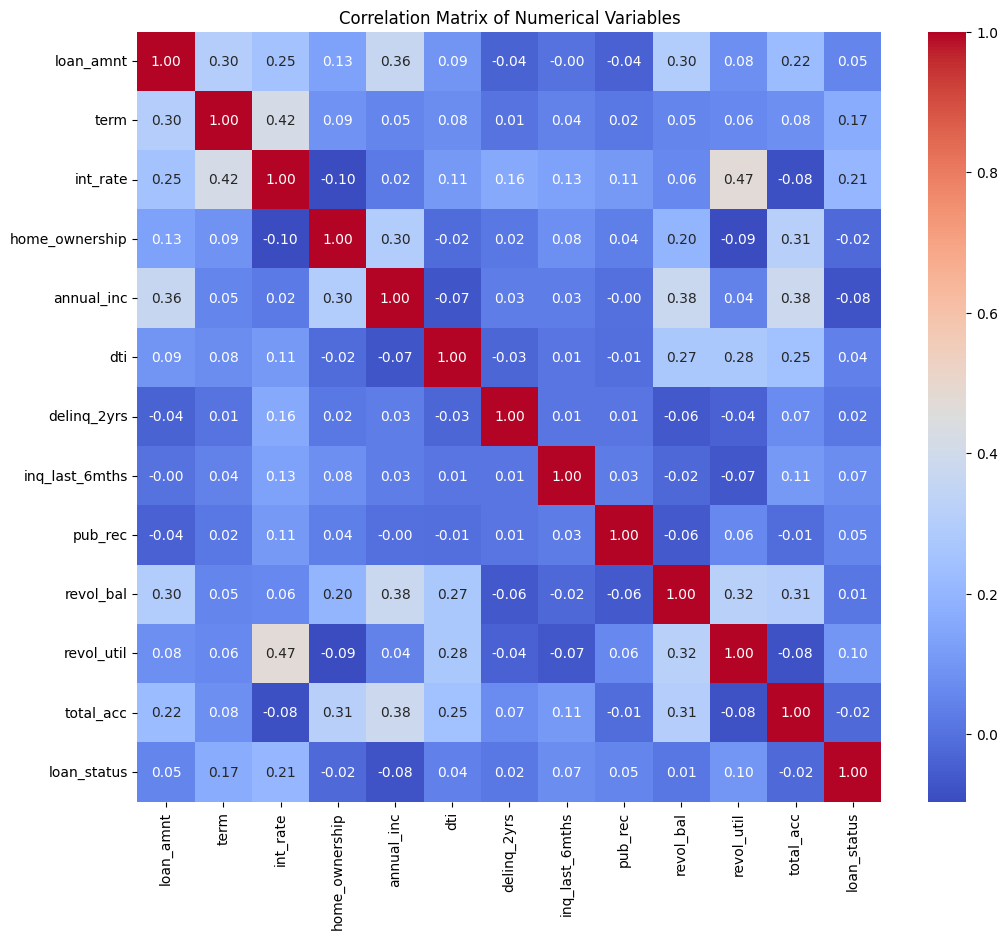

In [ ]:
# Select only numerical columns for correlation analysis, including the target variable 'loan_status'
numerical_data = data.select_dtypes(include=[np.number])

# Calculate the correlation matrix
correlation_matrix = numerical_data.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

**Handling Class Imbalance**

Suggestion - Perform SMOTE here

In [ ]:
from imblearn.over_sampling import SMOTE


In [ ]:
X = data.drop('loan_status',axis=1)
y = data['loan_status']



In [ ]:

X_resampled, y_resampled = SMOTE().fit_resample(X, y)

In [ ]:
## Check the distribution of class in the newly resampled data

display(y_resampled.value_counts())
print(X_resampled.shape, y_resampled.shape)

,count
loan_status,
0,30211
1,30211


(60422, 12) (60422,)


**Train-test split**

Now that we have handled class imbalance, let's perform the train-test split. We have to do a few additional imports

In [ ]:
# Splitting our dataset between training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

In [ ]:
## Check the samples
print("sample train data:\n", X_train[:5])

sample train data:
           loan_amnt       term   int_rate  home_ownership     annual_inc  \
54191   6350.400066  60.000000  14.662352               1   50000.000000   
47519   2108.950549  54.179011  16.788105               0   20702.983516   
40599   4916.808202  36.000000  12.701849               1   54415.958991   
45870  15000.000000  36.000000  15.603838               2   50000.000000   
15699  21000.000000  60.000000  17.880000               0  121296.000000   

             dti  delinq_2yrs  inq_last_6mths  pub_rec     revol_bal  \
54191  17.614672     0.350400        0.649600      0.0   2419.078355   
47519  13.757964     0.970165        3.000000      0.0      0.000000   
40599   1.103838     1.415959        0.000000      0.0    392.475558   
45870   9.301381     0.000000        0.896293      0.0   6063.605009   
15699  22.500000     0.000000        1.000000      0.0  46354.000000   

       revol_util  total_acc  
54191   56.606878  20.897600  
47519    0.029105   5.727624

**Scaling**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler on the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Data after scaling:\n", X_train_scaled[:5])

Data after scaling:
 [[2.20769814e-01 1.00000000e+00 4.86952155e-01 2.50000000e-01
  3.65079365e-01 5.87351513e-01 3.18545515e-02 8.11999917e-02
  0.00000000e+00 1.64059813e-02 5.66635414e-01 2.05719536e-01]
 [6.07151151e-02 7.57458791e-01 5.98951767e-01 0.00000000e+00
  1.32563361e-01 4.58751709e-01 8.81968033e-02 3.75000000e-01
  0.00000000e+00 0.00000000e+00 2.91340792e-04 3.13519957e-02]
 [1.66672008e-01 0.00000000e+00 3.83659068e-01 2.50000000e-01
  4.00126659e-01 3.68068525e-02 1.28723545e-01 0.00000000e+00
  0.00000000e+00 2.66173548e-03 3.92868426e-01 1.35179484e-01]
 [5.47169811e-01 0.00000000e+00 5.36556281e-01 5.00000000e-01
  3.65079365e-01 3.10149412e-01 0.00000000e+00 1.12036591e-01
  0.00000000e+00 4.11228477e-02 9.17641184e-01 1.52575277e-01]
 [7.73584906e-01 1.00000000e+00 6.56480506e-01 0.00000000e+00
  9.30920635e-01 7.50250083e-01 0.00000000e+00 1.25000000e-01
  0.00000000e+00 3.14368841e-01 8.73873874e-01 2.75862069e-01]]


### Model Building and Model Evaluation

- Your task is to build at least 3 models and evaluate their performance
- Start with a baseline model such as logistic regression
- Build additional models like decision trees, random forests, XGboost, etc.
- Make sure you're checking for overfitting and underfitting
- Use cross-validation and hyperparamater tuning to fit the best models
- Evaluate each of the model using metrics such as accuracy, precision, recall, ROC-AUC score, etc.
- Select the best possible model that you will be using for classfication

Let's start off with the simplest model - Logistic Regression

# **Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


In [ ]:
## Build the model
model = LogisticRegression()

## Fit the model
model.fit(X_train_scaled, y_train)
## Make predictions on the train data. This will be used later to check overfitting and underfitting.
y_train_pred = model.predict(X_train_scaled)
## Make predictions on the scaled test data
y_pred = model.predict(X_test_scaled)

## Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

## Check its evaluation metrics



Accuracy: 0.66


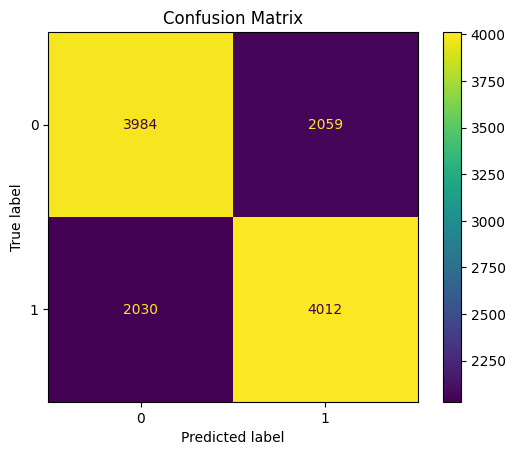

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

## Plot the Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.metrics import classification_report
## Plot the classification report

print(classification_report(y_train, y_train_pred))
print(classification_report(y_test, y_pred))



              precision    recall  f1-score   support

           0       0.66      0.66      0.66     24168
           1       0.66      0.67      0.66     24169

    accuracy                           0.66     48337
   macro avg       0.66      0.66      0.66     48337
weighted avg       0.66      0.66      0.66     48337

              precision    recall  f1-score   support

           0       0.66      0.66      0.66      6043
           1       0.66      0.66      0.66      6042

    accuracy                           0.66     12085
   macro avg       0.66      0.66      0.66     12085
weighted avg       0.66      0.66      0.66     12085



ROC AUC Score: 0.72


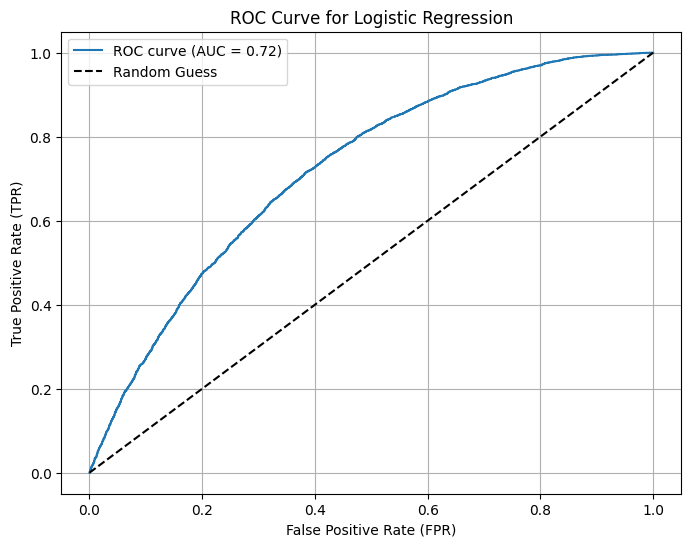

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

# Get predicted probabilities for the positive class (class 1)
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate the AUC score
auc = roc_auc_score(y_test, y_pred_proba)

print(f"ROC AUC Score: {auc:.2f}")

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for Logistic Regression')
plt.legend()
plt.grid(True)
plt.show()

Observation:
- Precision is correct 66% of the time. This minimizes False Positive. i.e. predicting a default when it wont happen. This will help not to reject good application

- Recall is correct 66% of the time. This minimizes False negative. i.e. failing to predict a default , when it happens. this could lead to appoving bad loans.

- f1-score is correct 66% of time. There is a moderate balance between Precision and Recall.

- accuracy is 66% of the time. This is due to balanced data injected by SMOTE

- Logistic regression does not look like a good model.

# **Random Forest Model**

In [ ]:
## Build the random forests model
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

## Fit the model
model.fit(X_train_scaled, y_train)

## Make predictions on the train data. This will be used later to check overfitting and underfitting.
y_train_pred = model.predict(X_train_scaled)

## Make predictions on the scaled test data
y_pred = model.predict(X_test_scaled)

## Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

## Check its evaluation metrics
print(classification_report(y_train, y_train_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.90
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     24168
           1       1.00      1.00      1.00     24169

    accuracy                           1.00     48337
   macro avg       1.00      1.00      1.00     48337
weighted avg       1.00      1.00      1.00     48337

              precision    recall  f1-score   support

           0       0.85      0.97      0.91      6043
           1       0.97      0.83      0.89      6042

    accuracy                           0.90     12085
   macro avg       0.91      0.90      0.90     12085
weighted avg       0.91      0.90      0.90     12085



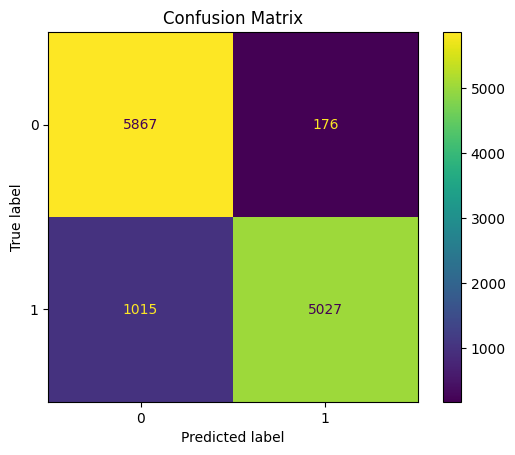

In [ ]:
## Plot the Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.title('Confusion Matrix')
plt.show()

ROC AUC Score: 0.95


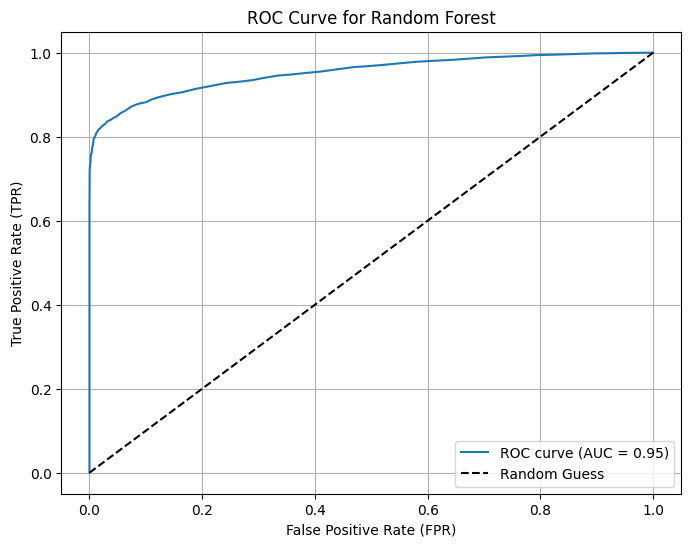

In [ ]:
# Get predicted probabilities for the positive class (class 1)
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate the AUC score
auc = roc_auc_score(y_test, y_pred_proba)

print(f"ROC AUC Score: {auc:.2f}")

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for Random Forest')
plt.legend()
plt.grid(True)
plt.show()

Observation:
- Precision is correct 85% of the time. This minimizes False Positive. i.e. predicting a default when it wont happen. This will help not to reject good application

- Recall is correct 97% of the time. This minimizes False negative. i.e. failing to predict a default , when it happens. this could lead to appoving bad loans.

- f1-score is correct 91% of time. There is a moderate balance between Precision and Recall.

-  The training set performance showed perfect scores (precision, recall, f1-score of 1.00), while the test set scores were lower. This indicates some degree of overfitting, although the test set performance is still strong.

- So far Random forest seems to be a good model.

# **K-N neighbors**

In [ ]:
## Build the KNN model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

# Function to evaluate model performance on both training and test sets
def evaluate_model(model, X_train, y_train, X_test, y_test):
    # Training Set Performance
    y_train_pred = model.predict(X_train)
    precision_train = precision_score(y_train, y_train_pred)
    recall_train = recall_score(y_train, y_train_pred)
    f1_train = f1_score(y_train, y_train_pred)

    # Test Set Performance
    y_test_pred = model.predict(X_test)
    precision_test = precision_score(y_test, y_test_pred)
    recall_test = recall_score(y_test, y_test_pred)
    f1_test = f1_score(y_test, y_test_pred)

    return precision_train, recall_train, f1_train, precision_test, recall_test, f1_test


# Experiment with various K values for K-NN
best_k = None
best_recall_test = 0
for k in range(1, 100, 10):  # Testing K values from 1 to 100 with a step size of 5
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train_scaled, y_train)

    # Using the corrected evaluate_model function
    precision_train, recall_train, f1_train, precision_test, recall_test, f1_test = evaluate_model(knn_model, X_train_scaled, y_train, X_test_scaled, y_test)

    print(f"n_neighbors: {k}")
    print(f"Training Recall: {recall_train:.2f}, Test Recall: {recall_test:.2f}")

    # Keep track of the best model based on recall
    if recall_test > best_recall_test:
        best_recall_test = recall_test
        best_k = k

print(f"\nBest n_neighbors for K-NN: {best_k}, with Test Recall: {best_recall_test:.2f}")

n_neighbors: 1
Training Recall: 1.00, Test Recall: 0.91
n_neighbors: 11
Training Recall: 0.85, Test Recall: 0.80
n_neighbors: 21
Training Recall: 0.79, Test Recall: 0.77
n_neighbors: 31
Training Recall: 0.77, Test Recall: 0.75
n_neighbors: 41
Training Recall: 0.76, Test Recall: 0.75
n_neighbors: 51
Training Recall: 0.75, Test Recall: 0.74
n_neighbors: 61
Training Recall: 0.75, Test Recall: 0.74
n_neighbors: 71
Training Recall: 0.74, Test Recall: 0.74
n_neighbors: 81
Training Recall: 0.74, Test Recall: 0.73
n_neighbors: 91
Training Recall: 0.73, Test Recall: 0.73

Best n_neighbors for K-NN: 1, with Test Recall: 0.91


ROC AUC Score: 0.95


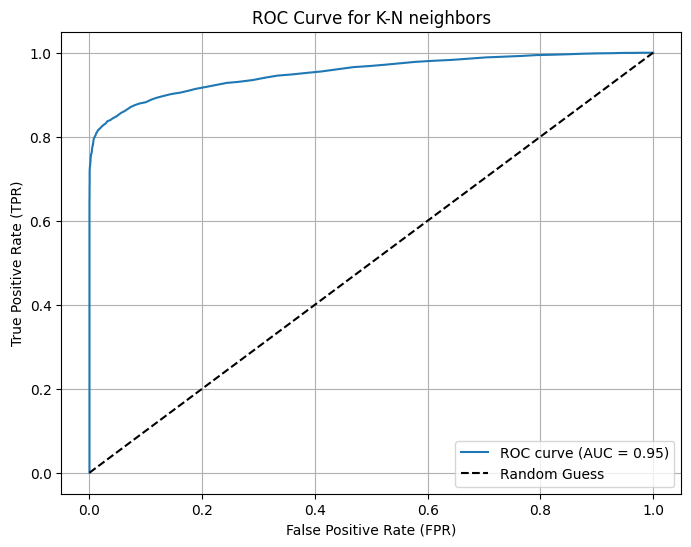

In [ ]:
# Get predicted probabilities for the positive class (class 1)
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate the AUC score
auc = roc_auc_score(y_test, y_pred_proba)

print(f"ROC AUC Score: {auc:.2f}")

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for K-N neighbors')
plt.legend()
plt.grid(True)
plt.show()

Observation:
- XGBoost model with default setting performed well, with an accuracy of 0.90 on the test set.
- The classification report showed a recall of 0.82 for Charged Off and a precision of 0.97 for Paid OFF.
- The training set performance was very high (accuracy 0.93, high precision and recall), suggesting some overfitting, similar to the Random Forest.

# **XGBoost without Tuning**

XGBoost Accuracy: 0.89

XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.99      0.93     24168
           1       0.99      0.86      0.92     24169

    accuracy                           0.93     48337
   macro avg       0.93      0.93      0.93     48337
weighted avg       0.93      0.93      0.93     48337

              precision    recall  f1-score   support

           0       0.84      0.97      0.90      6043
           1       0.97      0.82      0.89      6042

    accuracy                           0.89     12085
   macro avg       0.90      0.89      0.89     12085
weighted avg       0.90      0.89      0.89     12085



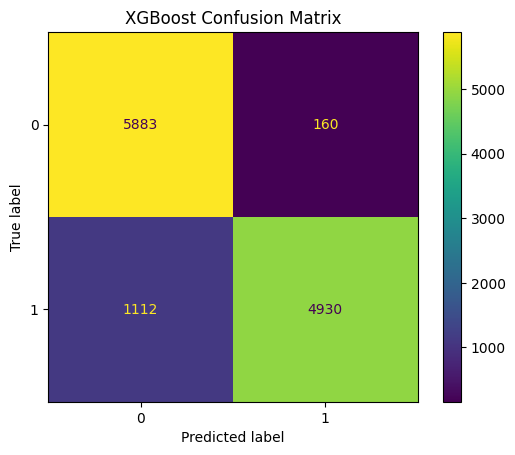

In [ ]:
#Builds XGBoost model

import xgboost as xgb

# Initialize and train the XGBoost model
xgb_model = xgb.XGBClassifier(random_state=42)
xgb_model.fit(X_train_scaled, y_train)

y_train_pred_xgb = xgb_model.predict(X_train_scaled)

# Make predictions on the scaled test data
y_pred_xgb = xgb_model.predict(X_test_scaled)

# Evaluate the model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"XGBoost Accuracy: {accuracy_xgb:.2f}")

# Check its evaluation metrics
print("\nXGBoost Classification Report:")
print(classification_report(y_train, y_train_pred_xgb))
print(classification_report(y_test, y_pred_xgb))

# Plot the Confusion Matrix
cm_xgb = confusion_matrix(y_test, y_pred_xgb, labels=xgb_model.classes_)
disp_xgb = ConfusionMatrixDisplay(confusion_matrix=cm_xgb, display_labels=xgb_model.classes_)
disp_xgb.plot()
plt.title('XGBoost Confusion Matrix')
plt.show()

ROC AUC Score: 0.95


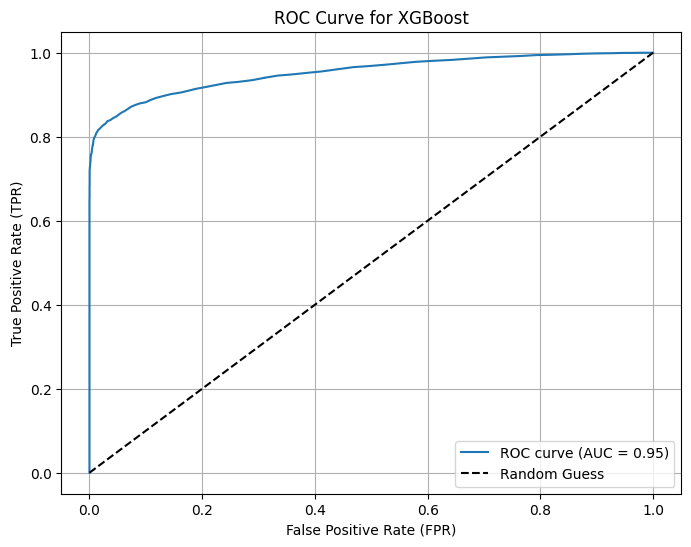

In [ ]:
# Get predicted probabilities for the positive class (class 1)
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate the AUC score
auc = roc_auc_score(y_test, y_pred_proba)

print(f"ROC AUC Score: {auc:.2f}")

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for XGBoost')
plt.legend()
plt.grid(True)
plt.show()

Observations

- The initial XGBoost model also performed well, with an accuracy of 0.90 on the test set.
- The classification report showed a recall of 0.82 for Charged Off and a precision of 0.97 for Paid OFF. This means less false negative (approving loans that defaults)
- The training set performance was higher (accuracy 0.93, high precision and recall) than test data, suggesting some overfitting.

# **XGBoost with Tuning**

Fitting 3 folds for each of 243 candidates, totalling 729 fits
Best hyperparameters: {'colsample_bytree': 0.8, 'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 300, 'subsample': 0.9}
Best F1-score: 0.8894744553943198

Classification Report for the best XGBoost model:
              precision    recall  f1-score   support

           0       0.84      0.97      0.90      6043
           1       0.97      0.82      0.89      6042

    accuracy                           0.90     12085
   macro avg       0.91      0.90      0.90     12085
weighted avg       0.91      0.90      0.90     12085



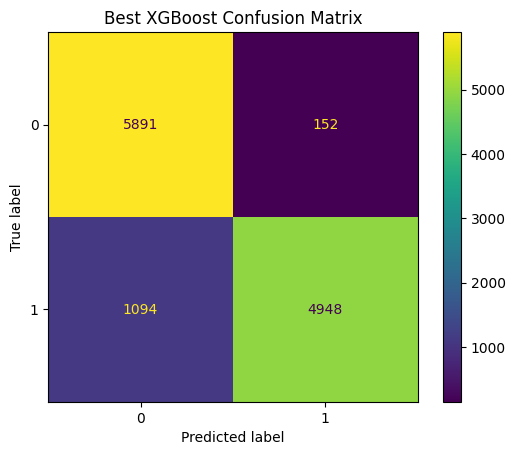

In [ ]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, make_scorer, f1_score

# Define the parameter grid to search
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of boosting rounds
    'max_depth': [3, 4, 5],          # Maximum depth of a tree
    'learning_rate': [0.01, 0.1, 0.2], # Step size shrinkage used in update to prevent overfitting
    'subsample': [0.7, 0.8, 0.9],    # Fraction of samples used for fitting the individual base learners
    'colsample_bytree': [0.7, 0.8, 0.9] # Fraction of features used for fitting the individual base learners
}

# Initialize the GridSearchCV object
# We will use F1-score as the scoring metric, as it balances precision and recall
grid_search = GridSearchCV(estimator=xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'),
                           param_grid=param_grid,
                           scoring=make_scorer(f1_score), # Or 'recall', 'precision', 'roc_auc' depending on your priority
                           cv=3,         # Number of cross-validation folds
                           verbose=2,    # Display progress
                           n_jobs=-1)    # Use all available cores

# Fit the grid search to the scaled training data
grid_search.fit(X_train_scaled, y_train)

# Print the best hyperparameters and the corresponding best score
print("Best hyperparameters:", grid_search.best_params_)
print("Best F1-score:", grid_search.best_score_)

# Get the best model from the grid search
best_xgb_model = grid_search.best_estimator_

# Evaluate the best model on the scaled test data
y_pred_best_xgb = best_xgb_model.predict(X_test_scaled)

# Print the classification report for the best model
print("\nClassification Report for the best XGBoost model:")
print(classification_report(y_test, y_pred_best_xgb))

# Plot the Confusion Matrix for the best model
cm_best_xgb = confusion_matrix(y_test, y_pred_best_xgb, labels=best_xgb_model.classes_)
disp_best_xgb = ConfusionMatrixDisplay(confusion_matrix=cm_best_xgb, display_labels=best_xgb_model.classes_)
disp_best_xgb.plot()
plt.title('Best XGBoost Confusion Matrix')
plt.show()

In [ ]:
y_train_pred_best_xgb = best_xgb_model.predict(X_train_scaled)

# Print the classification report for the best model
print("\nClassification Report for the best XGBoost model:")
print(classification_report(y_train, y_train_pred_best_xgb))


Classification Report for the best XGBoost model:
              precision    recall  f1-score   support

           0       0.88      0.99      0.93     24168
           1       0.99      0.86      0.92     24169

    accuracy                           0.93     48337
   macro avg       0.94      0.93      0.93     48337
weighted avg       0.94      0.93      0.93     48337



Observations:

- The XGBoost with Tuning model also performed well, with an accuracy of 0.90 on the test set.
- After tuning , there is not much differene in the predictions.

Next go ahead and build a decision tree and other models using the similar steps as above

Note
- You can build additional models as well
- Make sure you're performing the necessary steps to evaluate the model

Ensure that the following is done:

- The accuracy/precision/recall of the best model is at least between 80%
- All the necessary hyperparameter tuning, and regularization techniques (if needed) have been applied
- There's no overfitting

## Summary

Good work completing all the steps till now!
Now, go ahead and summarize your entire work and findings below:

- The best model would be the one that can do best predictions - less false negatives (approving a loan that defaults)

- XGBoost without Tuning seems to be a better model. Tuning takes time , but gives the same result.

- Random Forest is 2nd best model. However this may lead to more overfitting.

- Areas of improvement or future enhancements:
1. More data columns can be added. e.g. ratio of some numerical values that may be more informative for the model.
2. More modeling techniqes can be applied. This may require more study material.
3. Coss validation techniqe is applied only on XGBoost, it can also be applied on more models to shows its performance and help confirm overfitting.

---

### **Some Python libraries that are worth exploring for similar projects**
  - **tqdm**: A Python library used to create progress bars for iterables. It provides visual feedback on the progress of long-running operations, making it easier to track the execution time and estimate the remaining time.
  - **Low-code learning libraries** Use lazypredict or PyCaret to compare the performance of multiple Machine Learning models simultaneously. *The best part is that you only need to write fewer than 10 lines of code.*
  - **Explainable AI**: Understand model decisions through techniques like LIME or SHAP.